This notebook uses the before cleaned data set of articles that have been found under the keyword "computational neuroscience(s)" and conducts a preliminary analysis of the data. The data set is loaded and the following steps are performed: ...


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Fonts for plots
plt.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'

pd.set_option('display.max_columns', None)

# Path to data retrieval and storage
path = "C:/Users/kleinow/ownCloud/MA_Neuro"

In [2]:
# load cleaned data
cn = pd.read_csv(path + '/cn_items_clean.csv')
cn.head()
cn.shape # (1553, 53)

(1553, 52)

Co-Occuring Keywords together with "computational neuroscience(s)"

In [3]:
# Sort by column 'cit_all_years' in descending order (highest to lowest), set ascending=False:
sorted_cn = cn.sort_values(by='cit_all_years', ascending=False)
# For ascending order (lowest to highest), set ascending=True

#print(sorted_compn_df)

sorted_cn.head(10)

,item_id,fk_repository_history,pubyear,pubmonth,wos_pubdate_online,item_title,scopus_item_title_non_eng,first_author,doi,pmid,source_title,scopus_source_id,book_series_title,scopus_issue_title,pages,first_page,last_page,article_number,volume,issue,wos_special_issue,source_type,item_type,prepublication_item,languages,publisher_hash,wos_orga1_count,country_count,author_count,ref_count,source_ref_count,wos_aff_complete,german,vendor_pagecount,pagecount,wos_ci,keyword,class_name,cit_3_years,cit_5_years,cit_all_years,fncr_3_years,fncr_5_years,fncr_all_years,hc_3_years,hc_5_years,hc_all_years,oa_status,oa_url,scopus_oa_licence,abstract,title_lower
987,WOS:000261934500014,75203568,2009,1.0,NaN,Perceiving is believing: a Bayesian approach t...,NaN,"Fletcher, Paul C.",10.1038/nrn2536,19050712.0,NATURE REVIEWS NEUROSCIENCE,NaN,NaN,NaN,48-58,48,58,NaN,10,1,NaN,Journal,{Review},False,{eng},0F6692C64962C47392C6FA3D85DC71C4,3,2,2,113,88,True,False,11,NaN,"{SCI,SSCI}",NaN,{Neurosciences},69,156,790,4.256577,4.514705,7.392112,"{""(Neurosciences,1.0)""}","{""(Neurosciences,1.0)""}","{""(Neurosciences,1.0)""}",{green_submitted},NaN,NaN,"{""Advances in cognitive neuroscience offer us ...",perceiving is believing: a bayesian approach t...
582,WOS:000336976000076,28387251,2014,6.0,NaN,Performance-optimized hierarchical models pred...,NaN,"Yamins, Daniel L. K.",10.1073/pnas.1403112111,24812127.0,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCE...,NaN,NaN,NaN,8619-8624,8619,8624,NaN,111,23,NaN,Journal,{Article},False,{eng},822871511E2573578FE76570F5332853,1,1,6,37,31,True,False,6,NaN,{SCI},"{""computational neuroscience"",""computer vision...","{""Multidisciplinary Sciences""}",84,239,719,8.498113,11.669753,16.677921,"{""(Multidisciplinary Sciences,1.0)""}","{""(Multidisciplinary Sciences,1.0)""}","{""(Multidisciplinary Sciences,1.0)""}","{green_published,bronze}",NaN,NaN,"{""The ventral visual stream underlies key huma...",performance-optimized hierarchical models pred...
475,WOS:000181072800008,35954207,2003,2.0,NaN,Analysis of EEG records in an epileptic patien...,NaN,"Adeli, H",10.1016/s0165-0270(02)00340-0,12581851.0,JOURNAL OF NEUROSCIENCE METHODS,NaN,NaN,NaN,69-87,69,87,PII S0165-0270(02)00340-0,123,1,NaN,Journal,{Article},False,{eng},0BB51AA8CE24312F3057717FDFB61920,1,1,3,21,5,False,False,19,NaN,{SCI},"{""computational neuroscience"",encephalogram,ep...","{""Biochemical Research Methods"",Neurosciences}",16,55,718,2.435967,4.025667,14.937566,"{""(Neurosciences,0.30323625)"",""(Biochemical Re...","{""(Neurosciences,1.0)"",""(Biochemical Research ...","{""(Neurosciences,1.0)"",""(Biochemical Research ...",NaN,NaN,NaN,"{""About 1% of the people in the world suffer f...",analysis of eeg records in an epileptic patien...
704,WOS:A1995RP56000003,41874864,1995,8.0,NaN,AN EMERGENT MODEL OF ORIENTATION SELECTIVITY I...,NaN,"SOMERS, DC",NaN,7643194.0,JOURNAL OF NEUROSCIENCE,NaN,NaN,NaN,5448-5465,5448,5465,NaN,15,8,NaN,Journal,{Review},False,{eng},AF3E45B6BFE424FBC9B6DF5698AEB5B4,1,1,3,128,91,False,False,18,NaN,"{SCI,SSCI}","{""visual cortex"",""orientation selectivity"",""co...",{Neurosciences},53,120,655,3.541335,3.581071,4.931396,"{""(Neurosciences,1.0)""}","{""(Neurosciences,1.0)""}","{""(Neurosciences,1.0)""}",NaN,NaN,NaN,"{""It is well known that visual cortical neuron...",an emergent model of orientation selectivity i...
202,WOS:000336915700006,30277162,2014,5.0,NaN,Neurogrid: A Mixed-Analog-Digital Multichip Sy...,NaN,"Benjamin, Ben Varkey",10.1109/jproc.2014.2313565,NaN,PROCEEDINGS OF THE IEEE,NaN,NaN,NaN,699-716,699,716,NaN,102,5,SI,Journal,{Article},False,{eng},1F34E3A1102334398C110A0560924324,4,1,10,76,53,False,False,18,NaN,{SCI},"{""analog circuits"",""application specific integ...","{""Engineering, Electrical & Electronic""}",121,299,634,19.913765,22.883863,25.340580,"{""(\""Engineering, Electrical & Electronic\"",1....","{""(\""Engineering, Electrical & Electronic\"",1....","{""(\""Engineering, Electrical & Electronic\"",1....",NaN,NaN,NaN

Generate a table of the most commonly used keywords within the 50 most cited publications in the dataset

In [4]:
# Take first 50 rows of the 'keyword' column from the DataFrame (without NaN values)
first_50_keywords = sorted_cn['keyword'].dropna().head(50)

def extract_keywords(text):
    # find expressions inside curly brackets
    pattern = r'\{(.*?)\}'
    matches = re.findall(pattern, text)
    
    # If matches were found, process them; else, return an empty list
    if matches:
        # Split the comma-separated expressions and remove leading or trailing spaces
        keywords = [expr.strip() for expr in matches[0].split(',')]
        return keywords
    else:
        return []

# Apply the keyword extraction function to the filtered list of keywords
keywords_list = [extract_keywords(keyword) for keyword in first_50_keywords]
# Convert the inner lists to strings and join them together
cleaned_keywords = [', '.join(inner_list) for inner_list in keywords_list]
print(', '.join(cleaned_keywords))

"computational neuroscience", "computer vision", "array electrophysiology", "computational neuroscience", encephalogram, epilepsy, eeg, neurology, neuroscience, wavelet, "visual cortex", "orientation selectivity", "computational neuroscience", "recurrent excitation", "intracortical inhibition", "cortical circuits", "analog circuits", "application specific integrated circuits", "asynchronous circuits", "brain modeling", "computational neuroscience", "interconnection networks", "mixed analog-digital integrated circuits", "neural network hardware", "neuromorphic electronic systems", "biological vision", "computer vision", "object recognition", "neural network", "deep learning", "artificial intelligence", "computational neuroscience", "computer model", "computational neuroscience", "neural model", "spatial grid", fmri, encoding, decoding, "linear classifier", "multi-voxel pattern analysis", "computational neuroscience", "pattern recognition", "machine learning", "model selection", "cross v

In [5]:
from collections import Counter 

flattened_keywords = [keyword for sublist in keywords_list for keyword in sublist]

# Count occurrences of each keyword
keyword_counts = Counter(flattened_keywords)

# Find most common keywords and their counts
most_common_keywords = keyword_counts.most_common()

print(most_common_keywords)

[('"computational neuroscience"', 24), ('eeg', 3), ('neuroscience', 3), ('fmri', 3), ('simulation', 3), ('cognition', 3), ('learning', 3), ('"predictive coding"', 3), ('emotion', 3), ('"computer vision"', 2), ('epilepsy', 2), ('"object recognition"', 2), ('"neural network"', 2), ('"computer model"', 2), ('"neural model"', 2), ('"attractor network"', 2), ('"gist of a scene"', 2), ('saliency', 2), ('"scene recognition"', 2), ('"image classification"', 2), ('"image statistics"', 2), ('"robot vision"', 2), ('"robot localization"', 2), ('reasoning', 2), ('"short-term memory"', 2), ('python', 2), ('"spiking neural networks"', 2), ('schizophrenia', 2), ('"reinforcement learning"', 2), ('decision-making', 2), ('prediction', 2), ('"optimal control"', 2), ('"computational model"', 2), ('"array electrophysiology"', 1), ('encephalogram', 1), ('neurology', 1), ('wavelet', 1), ('"visual cortex"', 1), ('"orientation selectivity"', 1), ('"recurrent excitation"', 1), ('"intracortical inhibition"', 1), 

In [6]:
# Convert tuple list to df
keywords_df = pd.DataFrame(most_common_keywords, columns=['Keyword', 'Count'])

print(keywords_df)

                          Keyword  Count
0    "computational neuroscience"     24
1                             eeg      3
2                    neuroscience      3
3                            fmri      3
4                      simulation      3
..                            ...    ...
241                "reward value"      1
242          "saccade adaptation"      1
243          "saccade kinematics"      1
244              "forward models"      1
245                  sensorimotor      1

[246 rows x 2 columns]


Most commonly used keywords in the whole data set

In [7]:
# the following re-defining of extract_keywords should take care of the keywords sometimes having double quotes around them

def extract_keywords(text):
    # find expressions inside curly brackets
    pattern = r'\{(.*?)\}'
    matches = re.findall(pattern, text)
    
    # if matches are found, take them. else, return empty list
    if matches:
        # split comma-separated expressions, remove leading or trailing spaces, and remove double quotes
        keywords = [expr.strip().replace('"', '') for expr in matches[0].split(',')]
        return keywords
    else:
        return []
    
    
# From here on, it would work without the beforementioned extract_keywords function as well, but then still leave the quotes in the keywords
keywords_col = cn['keyword'].dropna().reset_index(drop=True)

all_keywords = [keyword for sublist in keywords_col.apply(extract_keywords) for keyword in sublist] # get the keywords from the series and flatten the list of lists

# Count occurrences of keywords
keywords_series = pd.Series(all_keywords)
keyword_counts = keywords_series.value_counts()

print(keyword_counts)

computational neuroscience              686
machine learning                         40
neural networks                          37
spiking neural networks                  36
simulation                               36
                                       ... 
sound source lateralization.              1
apraxia                                   1
context                                   1
neuropsychological models of apraxia      1
cpg                                       1
Length: 3743, dtype: int64


3743 different keywords are used in the keyword section, which implies a heterogenious understanding of what computational neuroscience goes along with /refers to. 
The most commonly used with computational neuroscience (686) are the following:
- machine learning                         40
- neural networks                          37
- spiking neural networks                  36
- simulation                               36

Publication years

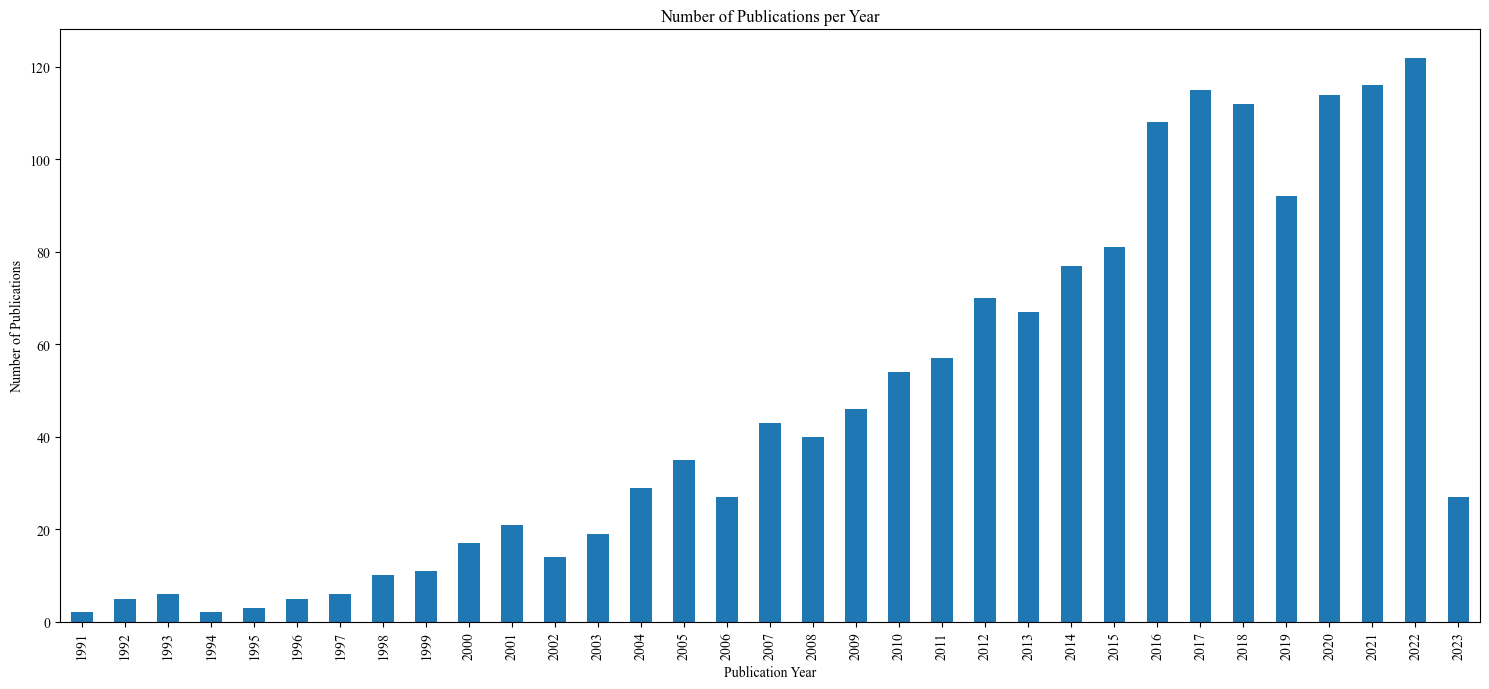

In [8]:
pubyear_counts = cn['pubyear'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(15, 7))
pubyear_counts.plot(kind='bar')
plt.title('Number of Publications per Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.tight_layout()
plt.show()

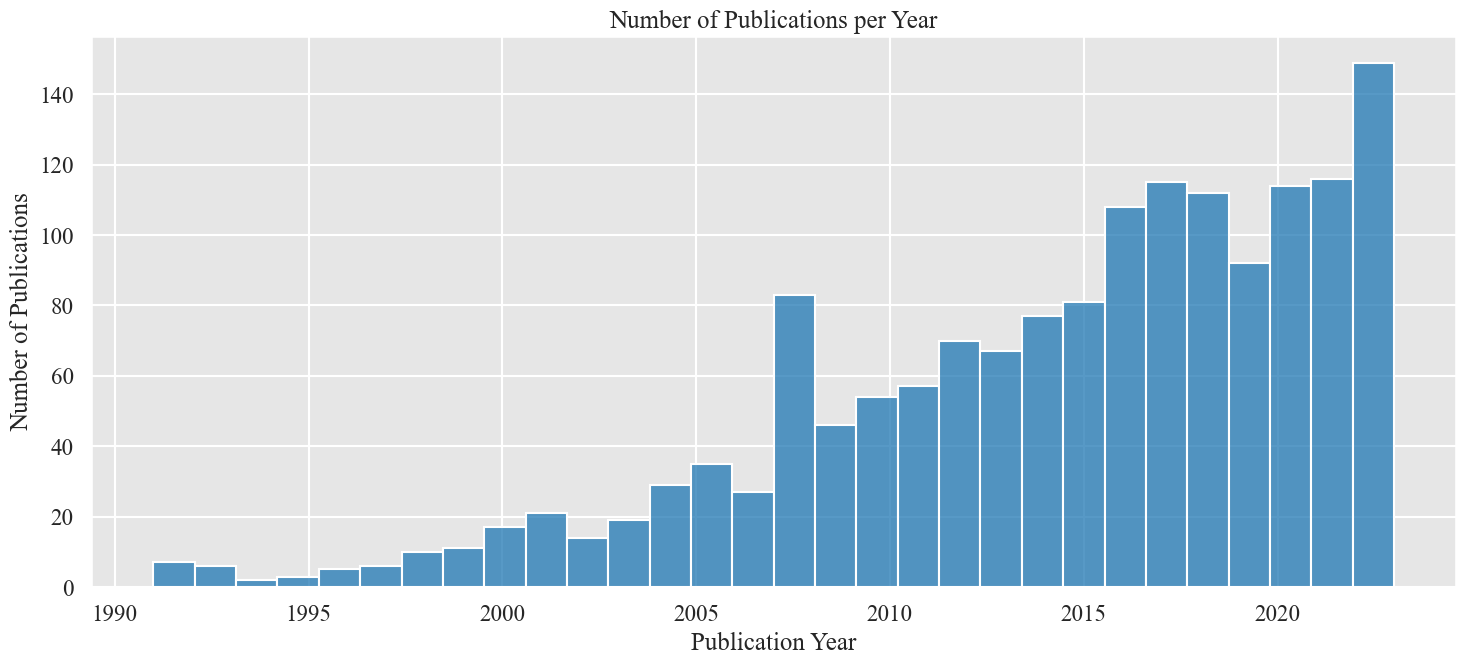

In [9]:

sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # gray background with white grid
sns.set_context("talk")  # makes elements larger

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

plt.figure(figsize=(15, 7))
sns.histplot(data=cn, x='pubyear',  bins=30) #kde=True, kde_kws={'bw_adjust': 0.5})

plt.title('Number of Publications per Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.tight_layout()

plt.show()

Note: Dent in 2019 can be speculated due to the pandemic and shifted priorities or the difficulties to continue research as usual. Then there is the isudden increase for the year of 2022 which might be due to publications that were put on hold in 2020 and 2021.

Permanent DOI or PMID of the articles

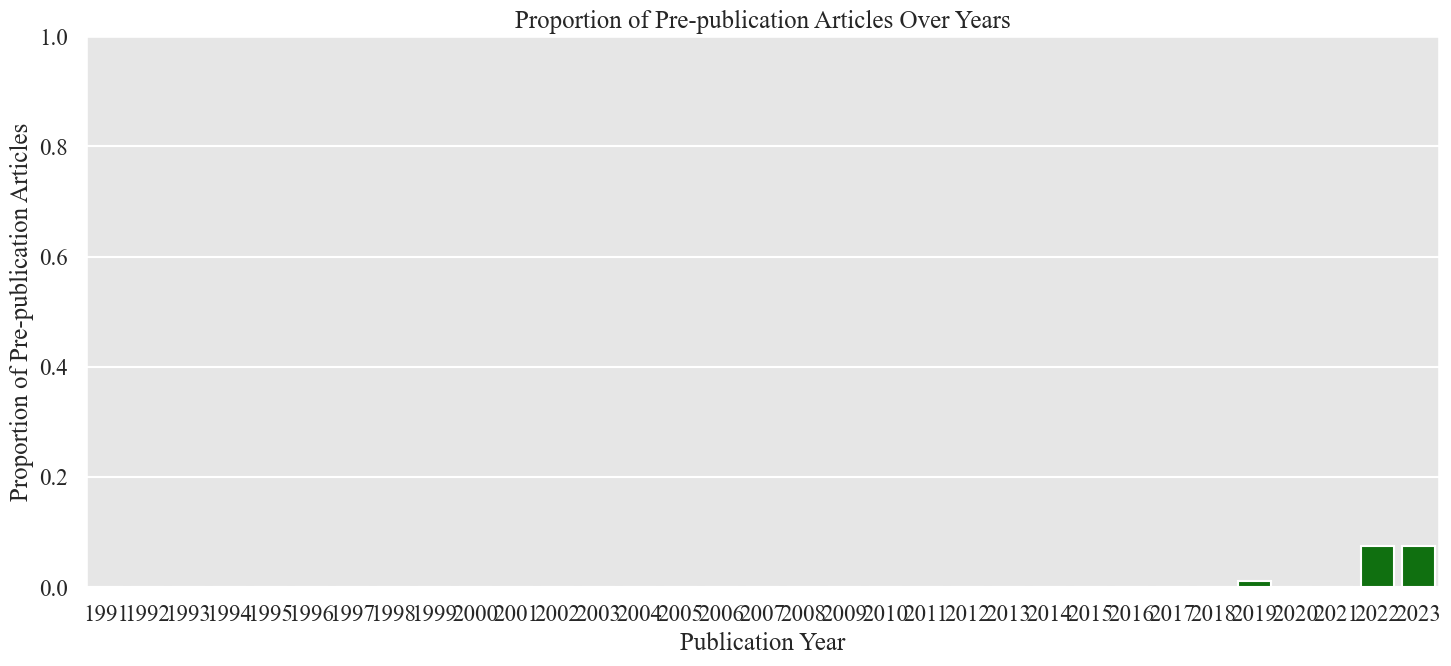

In [10]:
# Group by publication year and calculate the proportion of pre-publication items
grouped = cn.groupby('pubyear').agg(
    total_articles=('item_id', 'size'),
    prepub_articles=('prepublication_item', 'sum')
).reset_index()

# Convert True to 1 and False to 0 for summation
grouped['prepub_articles'] = grouped['prepub_articles'].astype(int)

# Calculate the proportion of pre-publication articles
grouped['prepub_proportion'] = grouped['prepub_articles'] / grouped['total_articles']

# Plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # gray background with white grid
sns.set_context("talk")  # makes elements larger, useful for presentations

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

plt.figure(figsize=(15, 7))
sns.barplot(x=grouped['pubyear'], y=grouped['prepub_proportion'], color='green')

plt.title('Proportion of Pre-publication Articles Over Years')
plt.xlabel('Publication Year')
plt.ylabel('Proportion of Pre-publication Articles')
plt.tight_layout()
plt.ylim(0, 1)  # to represent proportion from 0 to 1

plt.show()

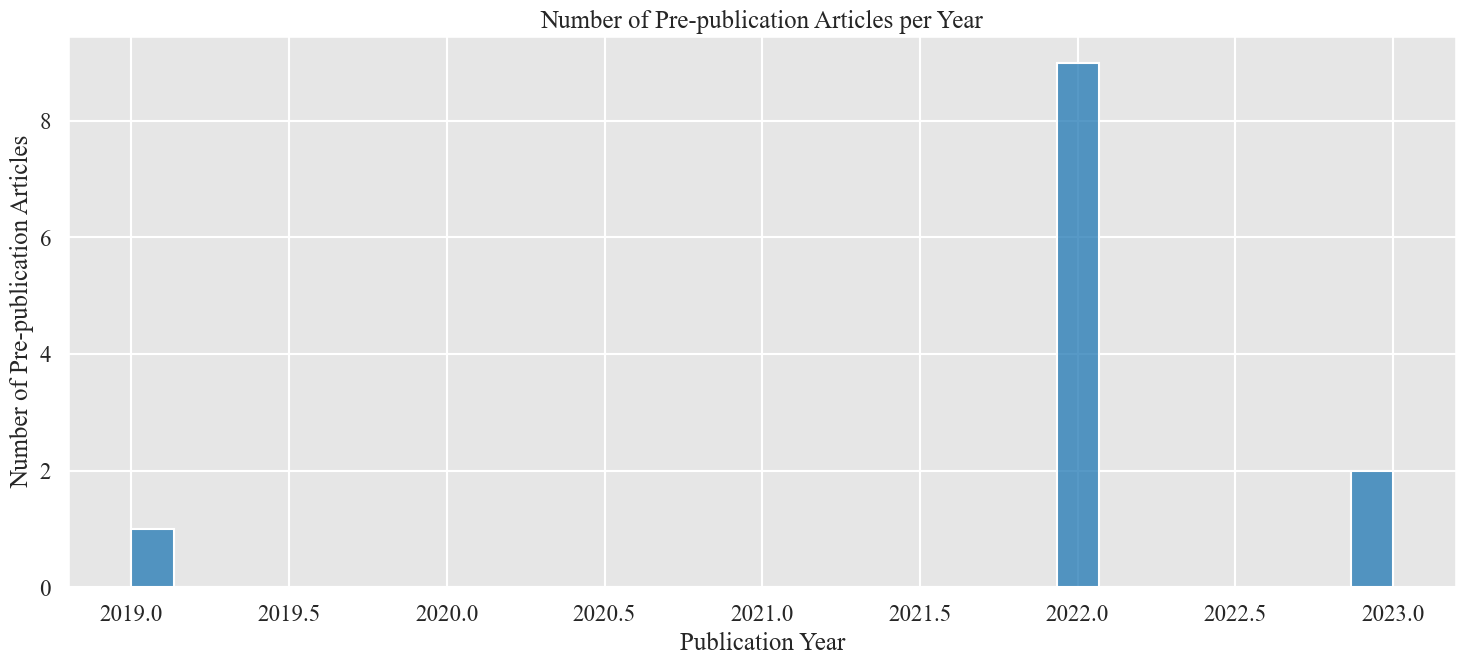

In [11]:
# Filter only rows where prepublication_item is True
prepub_df = cn[cn['prepublication_item']]

# Setting aesthetics
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # gray background with white grid
sns.set_context("talk")  # makes elements larger, useful for presentations
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Plot
plt.figure(figsize=(15, 7))
sns.histplot(data=prepub_df, x='pubyear', bins=30)

plt.title('Number of Pre-publication Articles per Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Pre-publication Articles')
plt.tight_layout()

plt.show()

This was not very interesting.

Average number of page count over the years

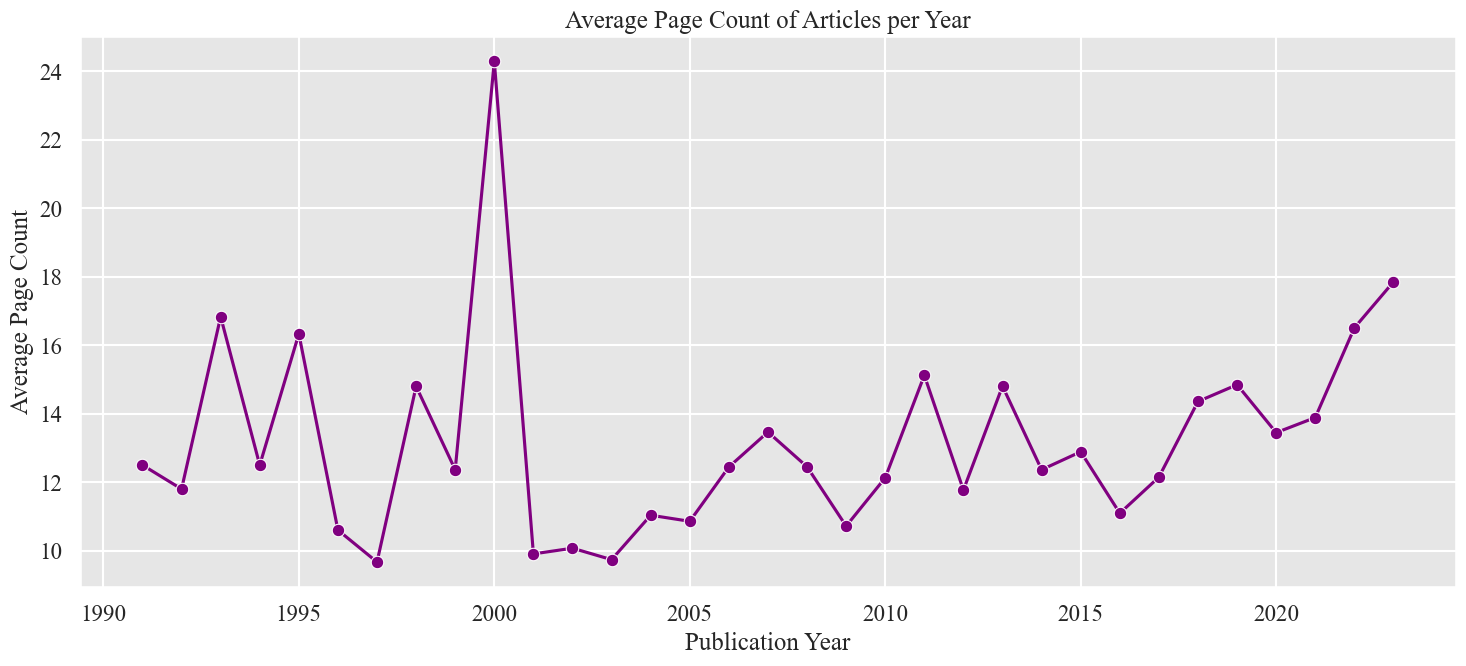

In [12]:
# Group by pubyear and calculate the mean pagecount
avg_pagecount_per_year = cn.groupby('pubyear')['vendor_pagecount'].mean().reset_index()

# Setting aesthetics
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # gray background with white grid
sns.set_context("talk")  # makes elements larger, useful for presentations
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=avg_pagecount_per_year, x='pubyear', y='vendor_pagecount', marker='o', color='purple')

plt.title('Average Page Count of Articles per Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Page Count')
plt.tight_layout()

plt.show()

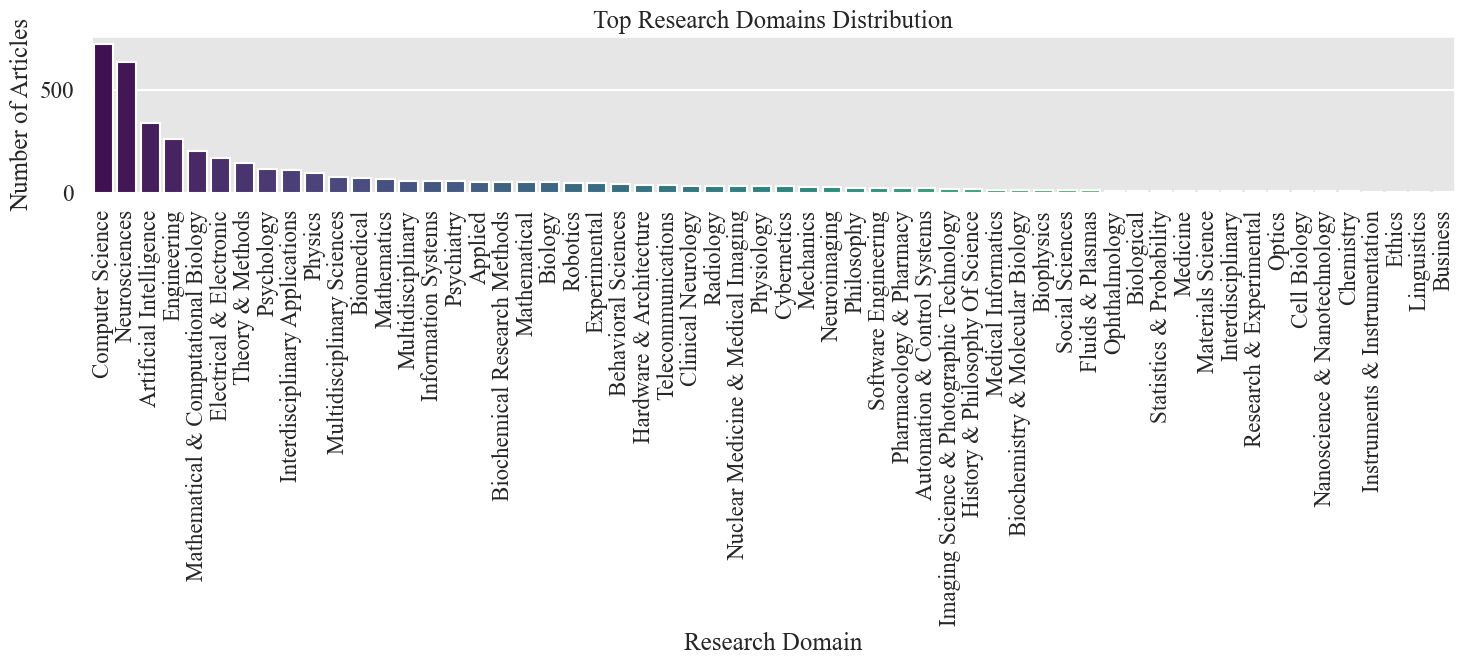

In [13]:

# Extract research domains from the class_name column
def extract_domains(text):
    # Remove curly brackets and split by comma
    items = text[1:-1].split(',')
    # Remove any surrounding quotes and strip whitespace
    items = [item.replace('"', '').strip() for item in items]
    return items

# Apply the function to the class_name column
cn['domains'] = cn['class_name'].apply(extract_domains)

# Expand the list into separate rows
domains_df = cn.explode('domains')

# Calculate the count of each domain
domain_counts = domains_df['domains'].value_counts()

# Filter to get only the top half of the domains
half_length = len(domain_counts) // 2
top_domains = domain_counts.head(half_length)

# Setting aesthetics
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # gray background with white grid
sns.set_context("talk")  # makes elements larger, useful for presentations
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Plot
plt.figure(figsize=(15, 7))
sns.barplot(x=top_domains.index, y=top_domains.values, palette="viridis") # looks pretty
plt.title('Top Research Domains Distribution')
plt.xlabel('Research Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

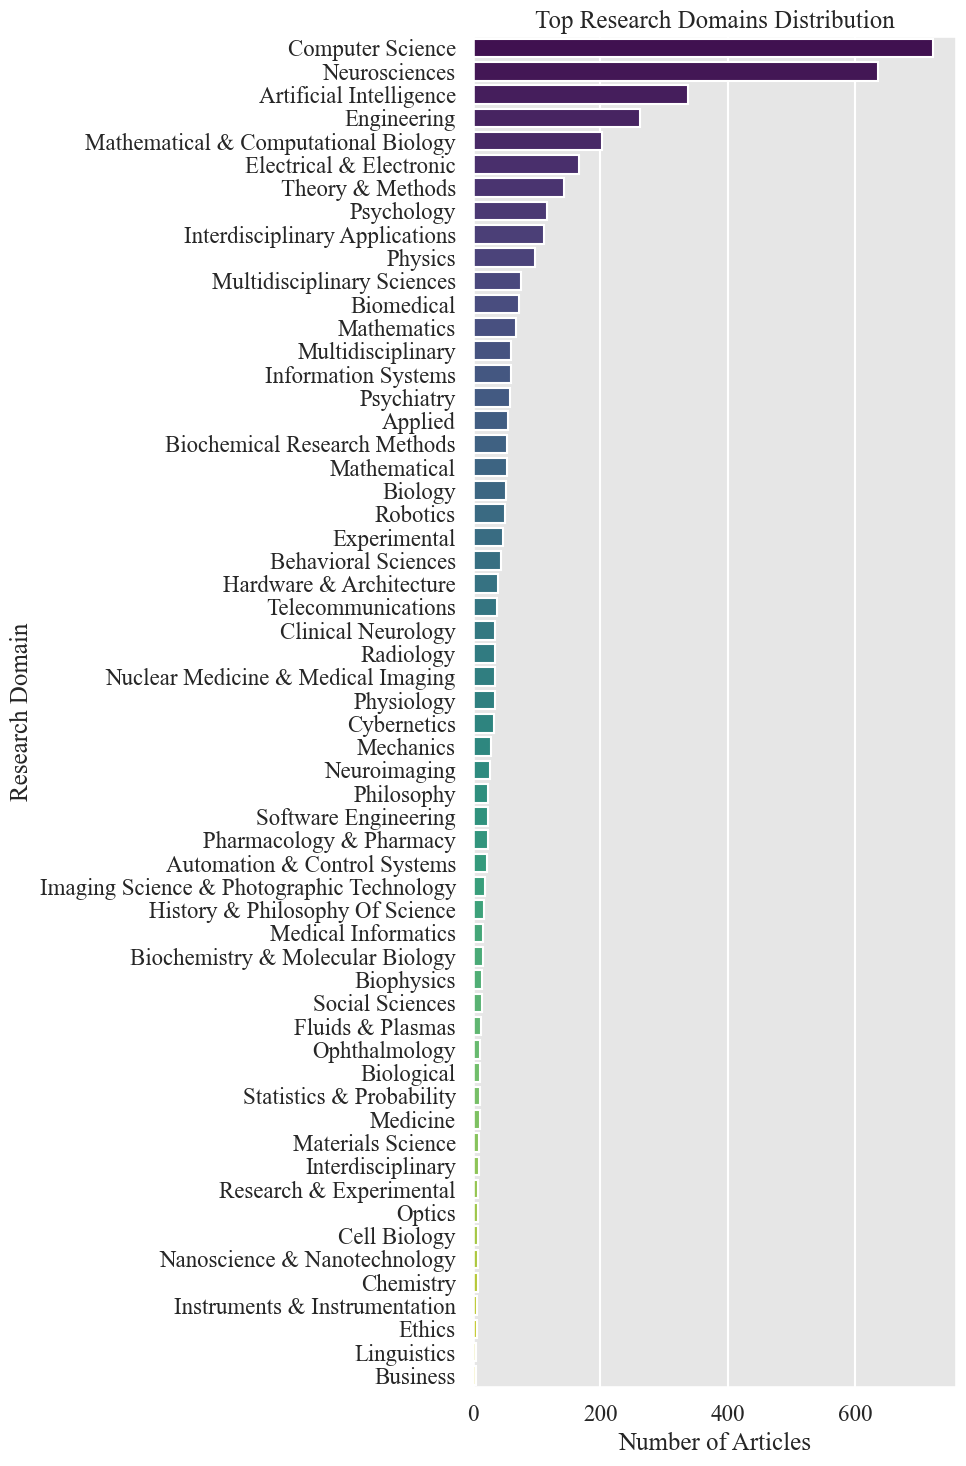

In [14]:
# Setting aesthetics
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # gray background with white grid
sns.set_context("talk")  # makes elements larger, useful for presentations
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Plot
plt.figure(figsize=(10, 15))  # Note we've swapped width and height
sns.barplot(y=top_domains.index, x=top_domains.values, palette="viridis")#, alpha = 0.7)  # Here, we swapped x and y; looks pretty, 
# check palettes https://search.r-project.org/CRAN/refmans/viridisLite/html/viridis.html
plt.title('Top Research Domains Distribution')
plt.ylabel('Research Domain')  # Note this is now y-label
plt.xlabel('Number of Articles')  # This is now x-label
plt.tight_layout()

plt.show()

Visualizing co-occurence of research Domains with a Chord Diagram

In [16]:
# Create co-occurrence matrix
top_30_domains = cn['domains'].explode().value_counts().head(30).index.tolist()
matrix = pd.DataFrame(index=top_30_domains, columns=top_30_domains, data=0)

for _, row in cn.iterrows():
    for domain1 in row['domains']:
        for domain2 in row['domains']:
            if domain1 in top_30_domains and domain2 in top_30_domains:
                matrix.at[domain1, domain2] += 1

# Convert matrix to links dataframe
links = matrix.stack().reset_index()
links.columns = ['source', 'target', 'value']
links = links[links['value'] > 0]  # Removing links with zero co-occurrence

# Create a Chord plot
chord = hv.Chord(links)
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str())
)

chord

:Chord   [source,target]   (value)

When domains are closer to each other on the circle and have stronger connecting arcs, it implies that they often appear together in the same context!

Different types of publications

In [23]:
item_type_counts = {}

# Iterate through each row
for _, row in cn.iterrows():
    items = row['item_type'][1:-1].split(',')
    items = [item.strip() for item in items]
    for item in items:
        if item in item_type_counts:
            item_type_counts[item] += 1
        else:
            item_type_counts[item] = 1

# Create a DataFrame from the dictionary
item_type_counts_df = pd.DataFrame(list(item_type_counts.items()), columns=['Item Type', 'Count'])

# Display the DataFrame
item_type_counts_df

,Item Type,Count
0,Article,956
1,"""Proceedings Paper""",412
2,Review,168
3,"""Book Chapter""",20
4,"""Meeting Abstract""",22
5,"""Editorial Material""",57
6,Correction,3
7,"""Early Access""",12
8,"""Data Paper""",2
